In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.4.1
1.13.3
2.0.2


In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [7]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

In [8]:
test_digits, test_labels = mnist.test.next_batch(200)

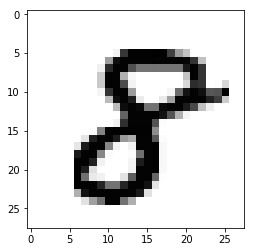

In [9]:
display_digit(test_digits[1])

In [10]:
test_labels[:5]

array([1, 8, 6, 7, 3], dtype=uint8)

In [11]:
n_steps = 28
n_inputs = 28
n_neurons = 200
n_outputs = 10

In [12]:
tf.reset_default_graph()

In [13]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [14]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [15]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [16]:
logits = tf.layers.dense(states, n_outputs)

In [17]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)

In [18]:
loss = tf.reduce_mean(xentropy)

In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [21]:
training_op = optimizer.minimize(loss)

In [22]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [23]:
init = tf.global_variables_initializer()

In [24]:
test_digits = test_digits.reshape((-1, n_steps, n_inputs))

In [25]:
n_epochs = 10
batch_size = 150

In [26]:
with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):

        for iteration in range(mnist.train.num_examples // batch_size):

            X_batch, y_batch = mnist.train.next_batch(batch_size)

            X_batch = X_batch.reshape((-1, n_steps, n_inputs))

            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: test_digits, y: test_labels})

        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.913333 Test accuracy: 0.945
1 Train accuracy: 0.94 Test accuracy: 0.97
2 Train accuracy: 0.966667 Test accuracy: 0.955
3 Train accuracy: 0.986667 Test accuracy: 0.975
4 Train accuracy: 0.973333 Test accuracy: 0.965
5 Train accuracy: 0.973333 Test accuracy: 0.975
6 Train accuracy: 0.966667 Test accuracy: 0.97
7 Train accuracy: 0.98 Test accuracy: 0.975
8 Train accuracy: 0.986667 Test accuracy: 0.965
9 Train accuracy: 0.973333 Test accuracy: 0.975
